Sharpe Ratio: OrderedDict([('sharperatio', 11.647332609673251)])


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,3.43,2006-04-03,2006-07-18,2006-09-26,127
1,2.07,2006-11-16,2006-12-22,NaT,NaN
2,1.51,2005-08-10,2005-09-22,2005-12-16,93
3,1.41,2005-04-08,2005-04-18,2005-06-17,51
4,1.35,2006-01-09,2006-01-24,2006-02-21,32


/Users/chensn/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 25.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/chensn/PycharmProjects/pythonProject/pyfolio-master/pyfolio/tears.py:906: UserWarning: Passed returns do not overlap with anyinteresting times.
  warnings.warn('Passed returns do not overlap with any'


Top 10 long positions of all time,max
2005-2006-day-001,39.34%


Top 10 short positions of all time,max


Top 10 positions of all time,max
2005-2006-day-001,39.34%


/Users/chensn/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


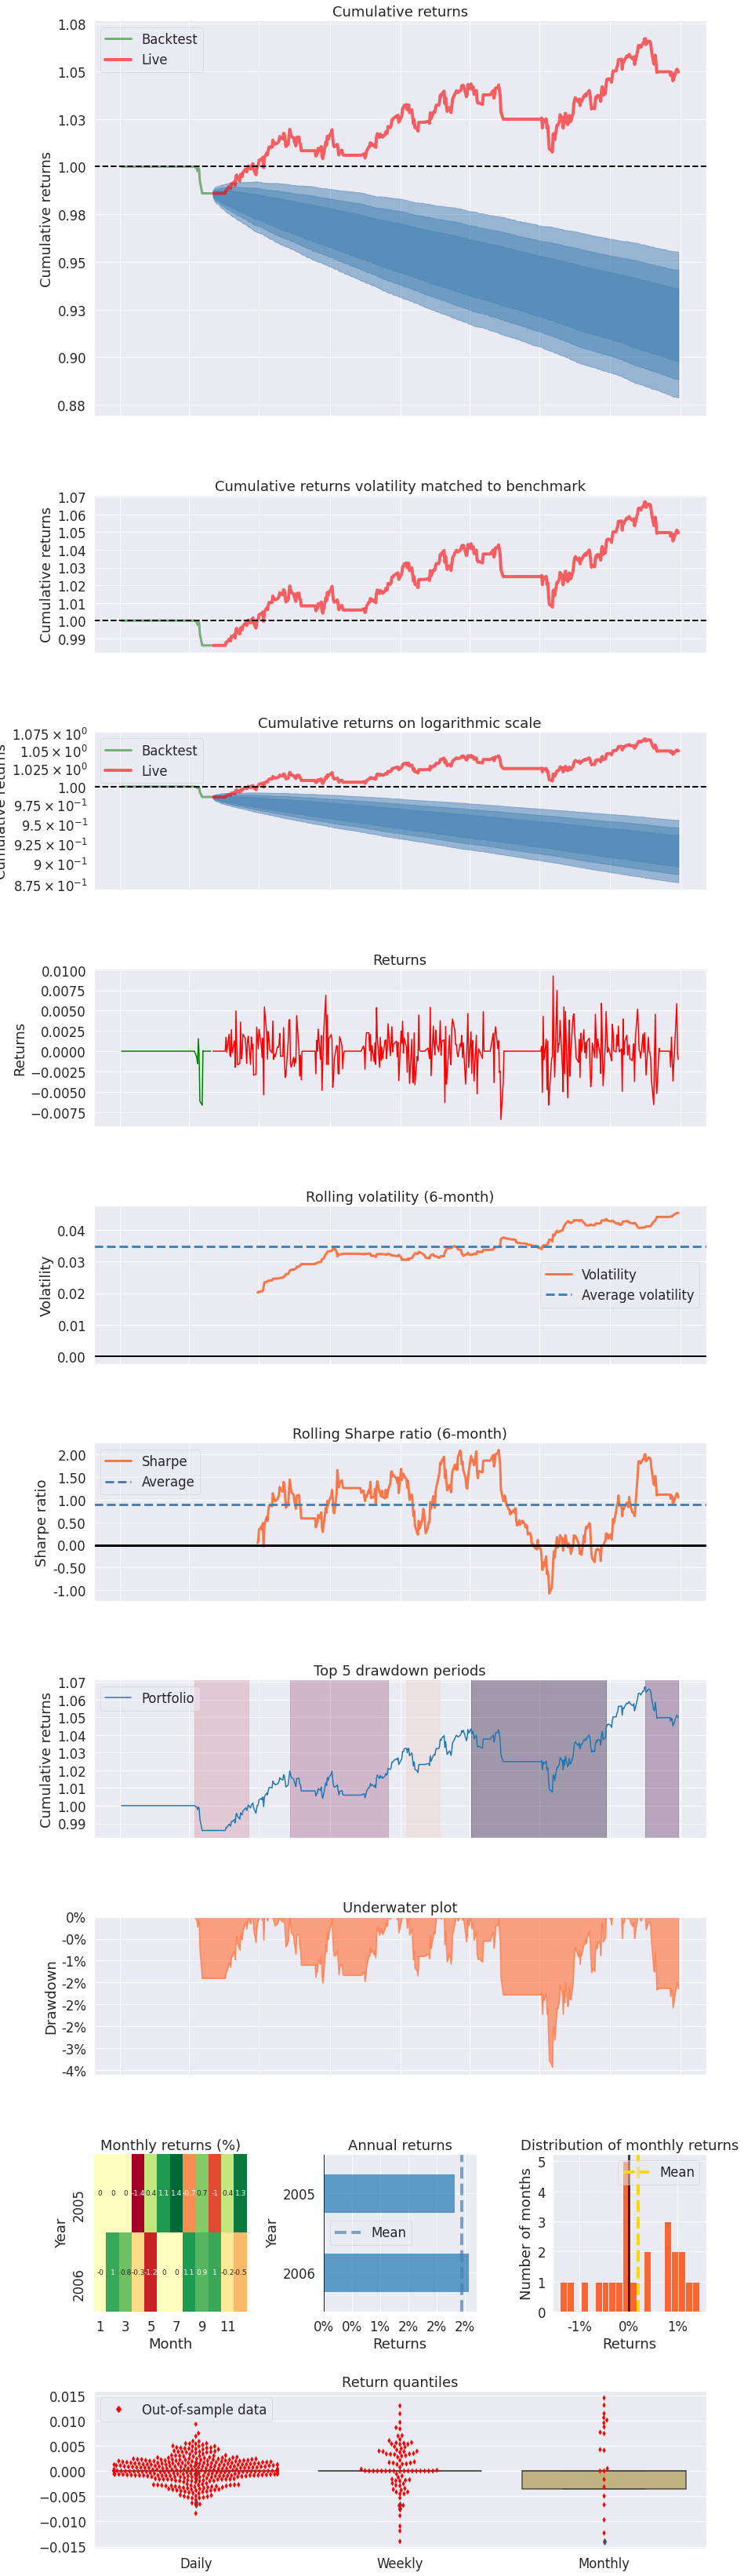

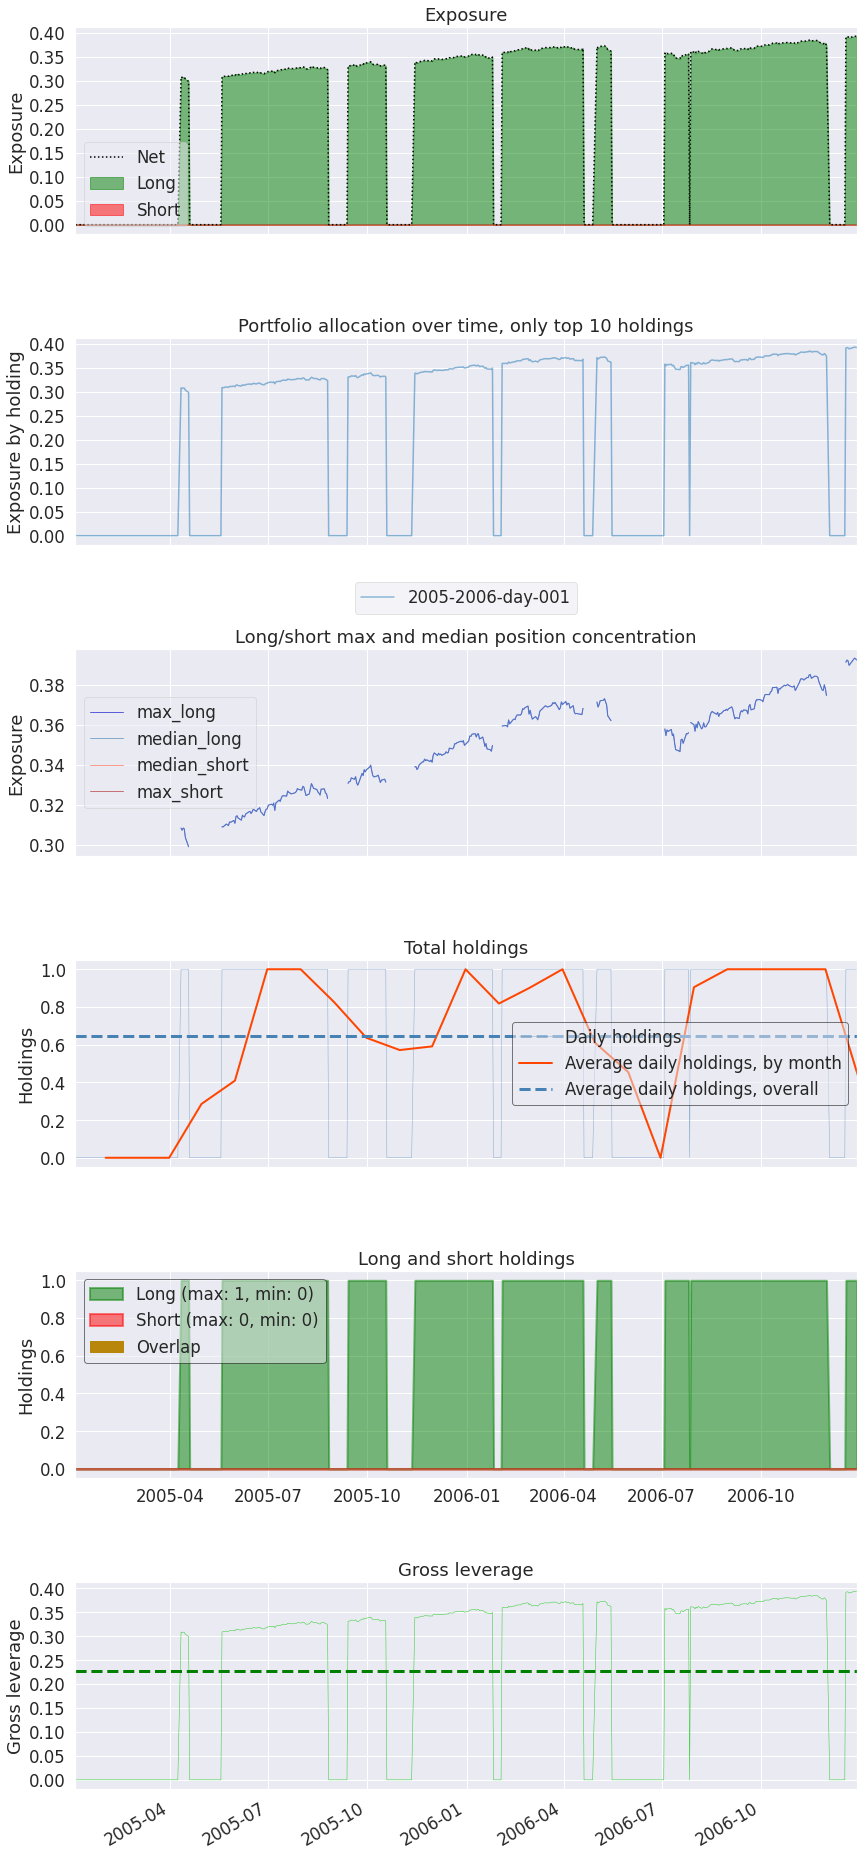

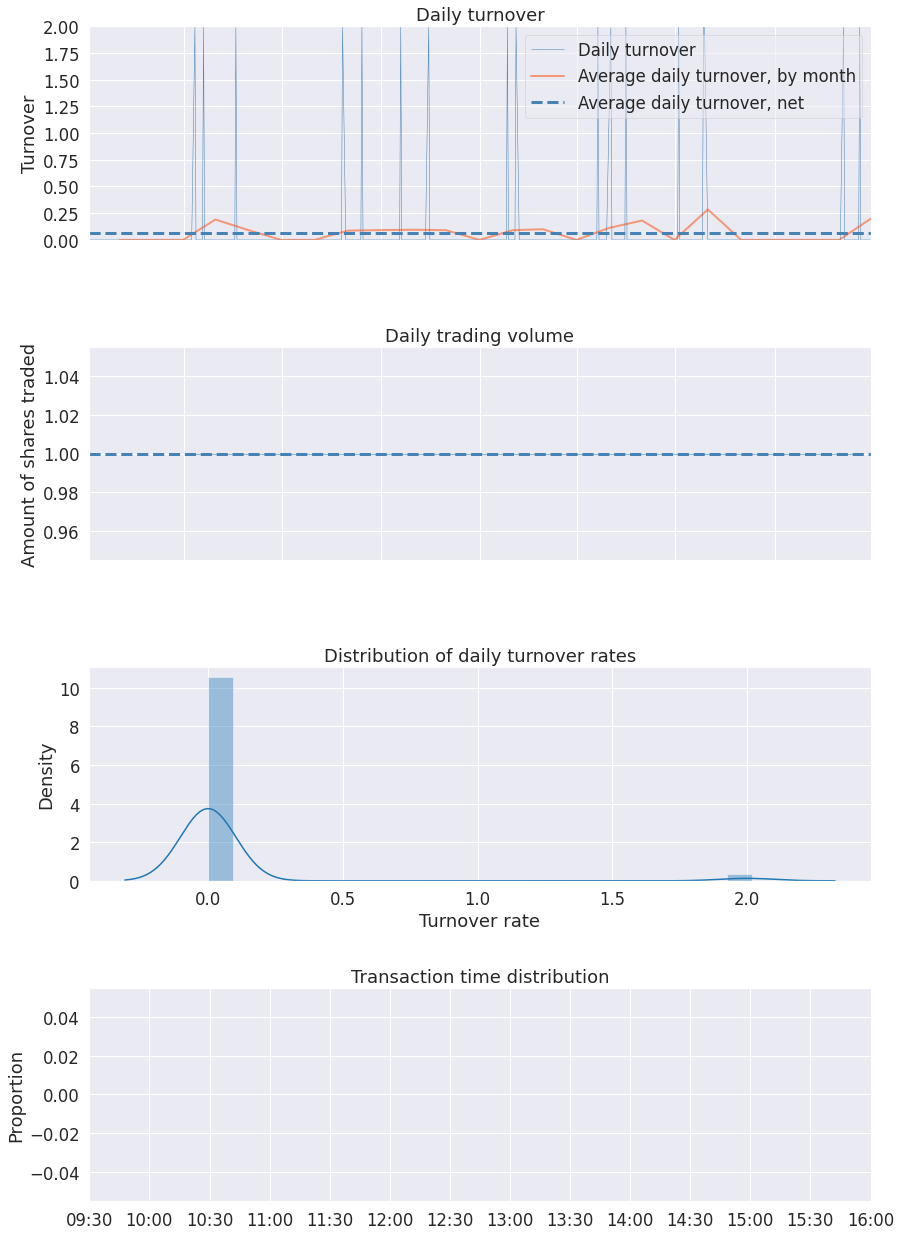

In [4]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime

import backtrader as bt
import backtrader.analyzers as btanalyzers
import backtrader.feeds as btfeeds
import backtrader.strategies as btstrats

import tables
cerebro = bt.Cerebro()

# data
dataname = '2005-2006-day-001.txt'
data = btfeeds.BacktraderCSVData(dataname=dataname)

cerebro.adddata(data)

# strategy
cerebro.addstrategy(btstrats.SMA_CrossOver)

# Analyzer
cerebro.addanalyzer(btanalyzers.SharpeRatio, _name='mysharpe')

thestrats = cerebro.run()
thestrat = thestrats[0]

print('Sharpe Ratio:', thestrat.analyzers.mysharpe.get_analysis())

# pyfolio
cerebro.addanalyzer(btanalyzers.PyFolio, _name='pyfolio')
res = cerebro.run()[0]
pyfolio = res.analyzers.getbyname('pyfolio')
returns,positions,transactions,gross_lev = pyfolio.get_pf_items()

# returns.to_hdf('return.h5',key='data')
# positions.to_hdf('position.h5',key='data')
# transactions.to_hdf('transactions.h5',key='data')

# pyfolio showtime
import pyfolio as pf
pf.create_full_tear_sheet(
    returns,
    positions=positions,
    transactions= transactions,
    live_start_date='2005-05-01'
   )